In [1]:
#Import Libraries
import pandas as pd
from iexcloud.iexcloud import iexCloud
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
iex = iexCloud()
ticker_symbol = 'AAPL'

In [2]:
#Fetch time-series data of chosen company
df = iex.get_moving_average_df(ticker_symbol)
df

Fetching time series data for AAPL
            Date      AAPL  Moving Average
0     2017-02-02   32.1325             NaN
1     2017-02-03   32.2700             NaN
2     2017-02-06   32.5725             NaN
3     2017-02-07   32.8825             NaN
4     2017-02-08   33.0100             NaN
...          ...       ...             ...
1253  2022-01-26  159.6900       90.524105
1254  2022-01-27  159.2200       90.646386
1255  2022-01-28  170.3300       90.781386
1256  2022-01-31  174.7800       90.921293
1257  2022-02-01  174.6100       91.061849

[1258 rows x 3 columns]


,Date,AAPL,Moving Average
0,2017-02-02,32.1325,NaN
1,2017-02-03,32.2700,NaN
2,2017-02-06,32.5725,NaN
3,2017-02-07,32.8825,NaN
4,2017-02-08,33.0100,NaN
...,...,...,...
1253,2022-01-26,159.6900,90.524105
1254,2022-01-27,159.2200,90.646386
1255,2022-01-28,170.3300,90.781386
1256,2022-01-31,174.7800,90.921293


In [53]:
#Moving Average Calculations
moving_average = df
moving_average['MA - 0.5 Years'] = moving_average[ticker_symbol].rolling(182).mean()
moving_average['MA - 1 Year'] = moving_average[ticker_symbol].rolling(365).mean()
moving_average['MA - 1.5 Years'] = moving_average[ticker_symbol].rolling(548).mean()
moving_average['MA - 2 Years'] = moving_average[ticker_symbol].rolling(365*2).mean()
moving_average['MA - 2.5 Years'] = moving_average[ticker_symbol].rolling(912).mean()
moving_average['MA - 3 Years'] = moving_average[ticker_symbol].rolling(365*3).mean()
moving_average['MA - 3.5 Years'] = moving_average[ticker_symbol].rolling(1278).mean()
moving_average


,Date,AAPL,MA - 0.5 Years,MA - 1 Year,MA - 1.5 Years,MA - 2 Years,MA - 2.5 Years,MA - 3 Years,MA - 3.5 Years
0,2017-01-30,30.4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-31,30.3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-01,32.1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-02-02,32.1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-02-03,32.2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1254,2022-01-24,161.6200,148.990934,136.418801,117.044548,100.866861,90.278793,82.363134,NaN
1255,2022-01-25,159.7800,149.155989,136.541459,117.216049,101.025625,90.401282,82.472812,NaN
1256,2022-01-26,159.6900,149.317967,136.664151,117.387924,101.184611,90.524105,82.583015,NaN
1257,2022-01-27,159.2200,149.495824,136.786377,117.559047,101.343646,90.646386,82.693401,NaN


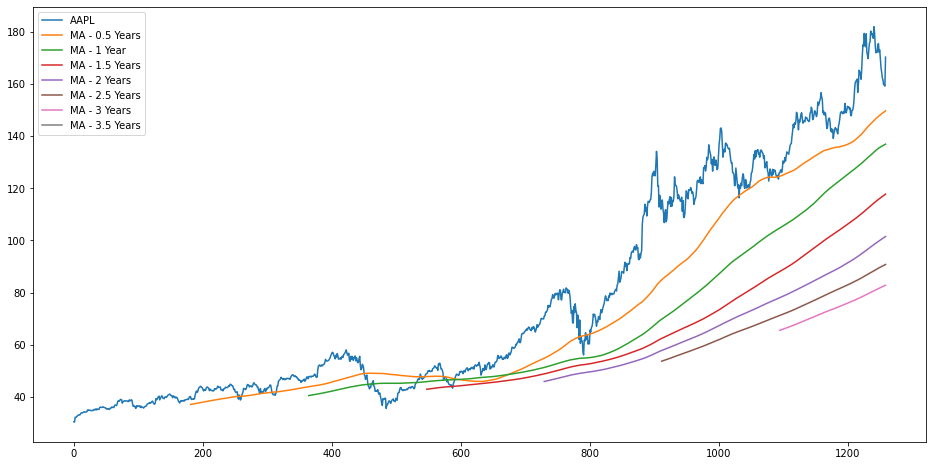

In [54]:
moving_average[[ticker_symbol, 
        'MA - 0.5 Years', 
        'MA - 1 Year', 
        'MA - 1.5 Years', 
        'MA - 2 Years',
        'MA - 2.5 Years', 
        'MA - 3 Years',
        'MA - 3.5 Years']].plot(label=ticker_symbol, figsize=(16, 8))

In [55]:
#Yield calculations
yield_df = df
price_1year = yield_df[yield_df['Date'] == str(date.today() - timedelta(days=366))][ticker_symbol]
price_2year = yield_df[yield_df['Date'] == str(date.today() - timedelta(days=367*2))][ticker_symbol]
price_3year = yield_df[yield_df['Date'] == str(date.today() - timedelta(days=368*3))][ticker_symbol]
price_4year = yield_df[yield_df['Date'] == str(date.today() - timedelta(days=368*4))][ticker_symbol]
yield_df['Date']= pd.to_datetime(df['Date'])

In [67]:
from functools import reduce
#time_period = 10

time_peroids = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dataframes = []
for i in time_peroids:
    placeholder = 'Placeholder'

    time_series_df = iex.get_max_time_series_df(ticker_symbol)
    dataframe_length = (len(time_series_df)-1)
    time_series_df[f'Momentum - {i}'] = placeholder

    for j in range(dataframe_length, -1, -1):   
        if j == (j-1):
            break
        else:
            time_series_df.iloc[j, time_series_df.columns.get_loc(f'Momentum - {i}')] = ((time_series_df.iloc[j, time_series_df.columns.get_loc(ticker_symbol)] - time_series_df.iloc[j - (i), time_series_df.columns.get_loc(ticker_symbol)]) / i)


    time_series_df = time_series_df[time_series_df[f'Momentum - {i}'] != placeholder]
    time_series_df[f'Momentum - {i}'] = time_series_df[f'Momentum - {i}'].astype(float)
    dataframes.append(time_series_df)

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='left'), dataframes)

    


Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL
Fetching time series data for AAPL


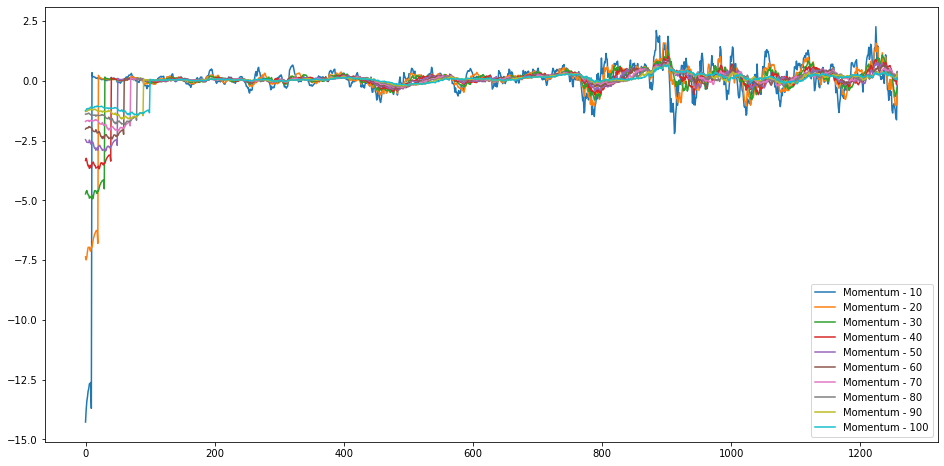

In [74]:
df_merged[['Date',
        'Momentum - 10', 
        'Momentum - 20', 
        'Momentum - 30', 
        'Momentum - 40',
        'Momentum - 50', 
        'Momentum - 60',
        'Momentum - 70',
        'Momentum - 80',
        'Momentum - 90',
        'Momentum - 100']].plot(label=ticker_symbol, figsize=(16, 8))

In [71]:
df_merged

,Date,AAPL_x,Momentum - 10,AAPL_y,Momentum - 20,AAPL_x,Momentum - 30,AAPL_y,Momentum - 40,AAPL_x,...,AAPL_y,Momentum - 60,AAPL_x,Momentum - 70,AAPL_y,Momentum - 80,AAPL_x,Momentum - 90,AAPL_y,Momentum - 100
0,2017-01-31,30.3375,-14.27325,30.3375,-7.361625,30.3375,-4.730750,30.3375,-3.335562,30.3375,...,30.3375,-2.019208,30.3375,-1.698893,30.3375,-1.395781,30.3375,-1.283472,30.3375,-1.247725
1,2017-02-01,32.1875,-13.76125,32.1875,-7.491125,32.1875,-4.631750,32.1875,-3.241313,32.1875,...,32.1875,-1.979542,32.1875,-1.675607,32.1875,-1.388781,32.1875,-1.273806,32.1875,-1.218825
2,2017-02-02,32.1325,-13.40975,32.1325,-7.378375,32.1325,-4.587250,32.1325,-3.329687,32.1325,...,32.1325,-1.985792,32.1325,-1.665107,32.1325,-1.384594,32.1325,-1.275417,32.1325,-1.168375
3,2017-02-03,32.2700,-13.22400,32.2700,-7.132500,32.2700,-4.690667,32.2700,-3.472750,32.2700,...,32.2700,-1.969500,32.2700,-1.662429,32.2700,-1.381750,32.2700,-1.256667,32.2700,-1.172800
4,2017-02-06,32.5725,-12.98375,32.5725,-6.971375,32.5725,-4.768917,32.5725,-3.562688,32.5725,...,32.5725,-1.970625,32.5725,-1.667821,32.5725,-1.361719,32.5725,-1.214861,32.5725,-1.155475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-01-24,161.6200,-1.05500,161.6200,-0.733000,161.6200,-0.431333,161.6200,-0.008000,161.6200,...,161.6200,0.212833,161.6200,0.295857,161.6200,0.234875,161.6200,0.139889,161.6200,0.097900
1254,2022-01-25,159.7800,-1.24100,159.7800,-1.027500,159.7800,-0.655667,159.7800,0.074250,159.7800,...,159.7800,0.120167,159.7800,0.228857,159.7800,0.228500,159.7800,0.122111,159.7800,0.072700
1255,2022-01-26,159.6900,-1.53900,159.6900,-0.980000,159.6900,-0.535000,159.6900,-0.013750,159.6900,...,159.6900,0.164833,159.6900,0.212143,159.6900,0.213000,159.6900,0.151444,159.6900,0.060400
1256,2022-01-27,159.2200,-1.63100,159.2200,-1.008000,159.2200,-0.503667,159.2200,-0.152000,159.2200,...,159.2200,0.171000,159.2200,0.181000,159.2200,0.251000,159.2200,0.180889,159.2200,0.049200
